# Pandas

The `numpy` module is excellent for numerical computations, but handling missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular, `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [192]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [193]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [194]:
# Series can be created from python dictionaries too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



a       cat
b         1
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [195]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -2.408163
c   -3.555297
d    2.267808
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [196]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [197]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 1970
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))


print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [198]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    10.160536
2018-11-20 14:45:00     9.935386
2018-11-21 14:45:00    11.468557
2018-11-22 14:45:00    10.016278
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.160536
2018-11-20 14:45:00     9.935386
2018-11-21 14:45:00    11.468557
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [199]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [200]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,0.644641,0.220054,-1.155474,-0.166665
2018-11-19 15:45:00,0.830398,0.766788,-0.243622,0.074132
2018-11-19 16:45:00,0.224685,0.335569,-0.114788,0.818433
2018-11-19 17:45:00,-0.737338,-0.646756,-1.247763,0.897696
2018-11-19 18:45:00,0.900908,-1.077062,-1.787620,-0.480067
2018-11-19 19:45:00,-2.160694,0.560077,-0.134840,1.215006
2018-11-19 20:45:00,1.394701,1.069168,0.562958,1.183288
2018-11-19 21:45:00,1.468707,-0.228666,0.511528,1.133590
2018-11-19 22:45:00,1.176596,0.106641,-0.767122,1.779290
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,1.974779


or by means of a dictionary:


In [201]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [202]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [203]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,0.644641,0.220054,-1.155474,-0.166665
2018-11-19 15:45:00,0.830398,0.766788,-0.243622,0.074132
2018-11-19 16:45:00,0.224685,0.335569,-0.114788,0.818433
2018-11-19 17:45:00,-0.737338,-0.646756,-1.247763,0.897696
2018-11-19 18:45:00,0.900908,-1.077062,-1.787620,-0.480067


In [204]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,1.394701,1.069168,0.562958,1.183288
2018-11-19 21:45:00,1.468707,-0.228666,0.511528,1.133590
2018-11-19 22:45:00,1.176596,0.106641,-0.767122,1.779290
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,1.974779


In [205]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [206]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [207]:
df.values

array([[ 0.64464092,  0.22005423, -1.15547435, -0.16666543],
       [ 0.83039782,  0.76678795, -0.24362194,  0.07413204],
       [ 0.224685  ,  0.33556941, -0.11478787,  0.81843292],
       [-0.73733793, -0.64675598, -1.24776321,  0.89769648],
       [ 0.90090757, -1.07706249, -1.7876201 , -0.48006738],
       [-2.16069426,  0.56007739, -0.13484002,  1.21500621],
       [ 1.39470101,  1.0691678 ,  0.56295826,  1.1832876 ],
       [ 1.46870652, -0.22866564,  0.51152788,  1.13358994],
       [ 1.17659622,  0.10664109, -0.76712175,  1.77929006],
       [-1.62026147,  0.58732505,  1.34702205,  1.97477934]])

In [208]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.212234,0.169314,-0.302972,0.842948
std,1.284133,0.658795,0.956959,0.806975
min,-2.160694,-1.077062,-1.787620,-0.480067
25%,-0.496832,-0.144839,-1.058386,0.260207
50%,0.737519,0.277812,-0.189231,1.015643
75%,1.107674,0.580513,0.354949,1.207077
max,1.468707,1.069168,1.347022,1.974779


In [209]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,0.644641,0.830398,0.224685,-0.737338,0.900908,-2.160694,1.394701,1.468707,1.176596,-1.620261
B,0.220054,0.766788,0.335569,-0.646756,-1.077062,0.560077,1.069168,-0.228666,0.106641,0.587325
C,-1.155474,-0.243622,-0.114788,-1.247763,-1.787620,-0.134840,0.562958,0.511528,-0.767122,1.347022
D,-0.166665,0.074132,0.818433,0.897696,-0.480067,1.215006,1.183288,1.133590,1.779290,1.974779


In [210]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,-0.166665,-1.155474,0.220054,0.644641
2018-11-19 15:45:00,0.074132,-0.243622,0.766788,0.830398
2018-11-19 16:45:00,0.818433,-0.114788,0.335569,0.224685
2018-11-19 17:45:00,0.897696,-1.247763,-0.646756,-0.737338
2018-11-19 18:45:00,-0.480067,-1.787620,-1.077062,0.900908
2018-11-19 19:45:00,1.215006,-0.134840,0.560077,-2.160694
2018-11-19 20:45:00,1.183288,0.562958,1.069168,1.394701
2018-11-19 21:45:00,1.133590,0.511528,-0.228666,1.468707
2018-11-19 22:45:00,1.779290,-0.767122,0.106641,1.176596
2018-11-19 23:45:00,1.974779,1.347022,0.587325,-1.620261


In [211]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 18:45:00,0.900908,-1.077062,-1.787620,-0.480067
2018-11-19 17:45:00,-0.737338,-0.646756,-1.247763,0.897696
2018-11-19 14:45:00,0.644641,0.220054,-1.155474,-0.166665
2018-11-19 22:45:00,1.176596,0.106641,-0.767122,1.779290
2018-11-19 15:45:00,0.830398,0.766788,-0.243622,0.074132
2018-11-19 19:45:00,-2.160694,0.560077,-0.134840,1.215006
2018-11-19 16:45:00,0.224685,0.335569,-0.114788,0.818433
2018-11-19 21:45:00,1.468707,-0.228666,0.511528,1.133590
2018-11-19 20:45:00,1.394701,1.069168,0.562958,1.183288
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,1.974779


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [212]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    0.644641
2018-11-19 15:45:00    0.830398
2018-11-19 16:45:00    0.224685
2018-11-19 17:45:00   -0.737338
2018-11-19 18:45:00    0.900908
2018-11-19 19:45:00   -2.160694
2018-11-19 20:45:00    1.394701
2018-11-19 21:45:00    1.468707
2018-11-19 22:45:00    1.176596
2018-11-19 23:45:00   -1.620261
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    0.644641
2018-11-19 15:45:00    0.830398
2018-11-19 16:45:00    0.224685
2018-11-19 17:45:00   -0.737338
2018-11-19 18:45:00    0.900908
2018-11-19 19:45:00   -2.160694
2018-11-19 20:45:00    1.394701
2018-11-19 21:45:00    1.468707
2018-11-19 22:45:00    1.176596
2018-11-19 23:45:00   -1.620261
Freq: H, Name: A, dtype: float64


In [213]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00  0.644641  0.220054 -1.155474 -0.166665
2018-11-19 15:45:00  0.830398  0.766788 -0.243622  0.074132
2018-11-19 16:45:00  0.224685  0.335569 -0.114788  0.818433
                            A         B         C         D
2018-11-19 14:45:00  0.644641  0.220054 -1.155474 -0.166665
2018-11-19 15:45:00  0.830398  0.766788 -0.243622  0.074132
2018-11-19 16:45:00  0.224685  0.335569 -0.114788  0.818433


### Selection by label

In [214]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]] #the first row

A    0.644641
B    0.220054
C   -1.155474
D   -0.166665
Name: 2018-11-19 14:45:00, dtype: float64

In [215]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']] #the columns A and B

,A,B
2018-11-19 14:45:00,0.644641,0.220054
2018-11-19 15:45:00,0.830398,0.766788
2018-11-19 16:45:00,0.224685,0.335569
2018-11-19 17:45:00,-0.737338,-0.646756
2018-11-19 18:45:00,0.900908,-1.077062
2018-11-19 19:45:00,-2.160694,0.560077
2018-11-19 20:45:00,1.394701,1.069168
2018-11-19 21:45:00,1.468707,-0.228666
2018-11-19 22:45:00,1.176596,0.106641
2018-11-19 23:45:00,-1.620261,0.587325


In [216]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,0.900908,-1.077062
2018-11-19 19:45:00,-2.160694,0.560077
2018-11-19 20:45:00,1.394701,1.069168


In [217]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.83039782041
0.83039782041


### Selecting by position

In [218]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.737338
B   -0.646756
C   -1.247763
D    0.897696
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -0.737338 -0.646756
2018-11-19 18:45:00  0.900908 -1.077062


In [219]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,0.830398,-0.243622
2018-11-19 16:45:00,0.224685,-0.114788
2018-11-19 18:45:00,0.900908,-1.787620


In [220]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  0.830398  0.766788 -0.243622  0.074132
2018-11-19 16:45:00  0.224685  0.335569 -0.114788  0.818433 

                            B         C
2018-11-19 14:45:00  0.220054 -1.155474
2018-11-19 15:45:00  0.766788 -0.243622
2018-11-19 16:45:00  0.335569 -0.114788
2018-11-19 17:45:00 -0.646756 -1.247763
2018-11-19 18:45:00 -1.077062 -1.787620
2018-11-19 19:45:00  0.560077 -0.134840
2018-11-19 20:45:00  1.069168  0.562958
2018-11-19 21:45:00 -0.228666  0.511528
2018-11-19 22:45:00  0.106641 -0.767122
2018-11-19 23:45:00  0.587325  1.347022


In [221]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.76678794919088489

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [222]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 14:45:00,0.644641,0.220054,-1.155474,-0.166665
2018-11-19 15:45:00,0.830398,0.766788,-0.243622,0.074132
2018-11-19 16:45:00,0.224685,0.335569,-0.114788,0.818433
2018-11-19 19:45:00,-2.160694,0.560077,-0.134840,1.215006
2018-11-19 20:45:00,1.394701,1.069168,0.562958,1.183288
2018-11-19 22:45:00,1.176596,0.106641,-0.767122,1.779290
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,1.974779


In [223]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,0.644641,0.220054,NaN,NaN
2018-11-19 15:45:00,0.830398,0.766788,NaN,0.074132
2018-11-19 16:45:00,0.224685,0.335569,NaN,0.818433
2018-11-19 17:45:00,NaN,NaN,NaN,0.897696
2018-11-19 18:45:00,0.900908,NaN,NaN,NaN
2018-11-19 19:45:00,NaN,0.560077,NaN,1.215006
2018-11-19 20:45:00,1.394701,1.069168,0.562958,1.183288
2018-11-19 21:45:00,1.468707,NaN,0.511528,1.133590
2018-11-19 22:45:00,1.176596,0.106641,NaN,1.779290
2018-11-19 23:45:00,NaN,0.587325,1.347022,1.974779


### Setting

Combination of selection and setting of values

In [224]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brand new column
df['E'] = np.arange(len(df))*0.5

# defining a brand new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [225]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.220054,-1.155474,5,0.0,0,1.000000
2018-11-19 15:45:00,0.830398,0.766788,-0.243622,5,0.5,2,0.999962
2018-11-19 16:45:00,0.224685,0.335569,-0.114788,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.737338,-0.646756,-1.247763,5,1.5,6,0.999657
2018-11-19 18:45:00,0.900908,-1.077062,-1.787620,5,2.0,8,0.999391
2018-11-19 19:45:00,-2.160694,0.560077,-0.134840,5,2.5,10,0.999048
2018-11-19 20:45:00,1.394701,1.069168,0.562958,5,3.0,12,0.998630
2018-11-19 21:45:00,1.468707,-0.228666,0.511528,5,3.5,14,0.998135
2018-11-19 22:45:00,1.176596,0.106641,-0.767122,5,4.0,16,0.997564
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,5,4.5,18,0.996917


In [226]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.220054,-1.155474,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.830398,-0.766788,-0.243622,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.224685,-0.335569,-0.114788,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.737338,-0.646756,-1.247763,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.900908,-1.077062,-1.787620,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-2.160694,-0.560077,-0.134840,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-1.394701,-1.069168,-0.562958,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-1.468707,-0.228666,-0.511528,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-1.176596,-0.106641,-0.767122,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-1.620261,-0.587325,-1.347022,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [227]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
#df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,0.220054,-1.155474,5,0.0,1.000000
2018-11-19 15:45:00,0.830398,0.766788,-0.243622,5,0.5,0.999962
2018-11-19 16:45:00,0.224685,0.335569,-0.114788,5,1.0,0.999848
2018-11-19 17:45:00,-0.737338,-0.646756,-1.247763,5,1.5,0.999657
2018-11-19 18:45:00,0.900908,-1.077062,-1.787620,5,2.0,0.999391
2018-11-19 19:45:00,-2.160694,0.560077,-0.134840,5,2.5,0.999048
2018-11-19 20:45:00,1.394701,1.069168,0.562958,5,3.0,0.998630
2018-11-19 21:45:00,1.468707,-0.228666,0.511528,5,3.5,0.998135
2018-11-19 22:45:00,1.176596,0.106641,-0.767122,5,4.0,0.997564
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,5,4.5,0.996917


In [228]:
# Dropping by raws
# save and always working
pippo = df.drop(df.index[[1,2,3,4]])
pippo


,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.220054,-1.155474,5,0.0,0,1.000000
2018-11-19 19:45:00,-2.160694,0.560077,-0.134840,5,2.5,10,0.999048
2018-11-19 20:45:00,1.394701,1.069168,0.562958,5,3.0,12,0.998630
2018-11-19 21:45:00,1.468707,-0.228666,0.511528,5,3.5,14,0.998135
2018-11-19 22:45:00,1.176596,0.106641,-0.767122,5,4.0,16,0.997564
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,5,4.5,18,0.996917


In [229]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))


,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.220054,-1.155474,5,0.0,0,1.000000
2018-11-19 15:45:00,0.830398,0.766788,-0.243622,5,0.5,2,0.999962
2018-11-19 16:45:00,0.224685,0.335569,-0.114788,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.737338,-0.646756,-1.247763,5,1.5,6,0.999657
2018-11-19 18:45:00,0.900908,-1.077062,-1.787620,5,2.0,8,0.999391
2018-11-19 19:45:00,-2.160694,0.560077,-0.134840,5,2.5,10,0.999048
2018-11-19 20:45:00,1.394701,1.069168,0.562958,5,3.0,12,0.998630
2018-11-19 21:45:00,1.468707,-0.228666,0.511528,5,3.5,14,0.998135
2018-11-19 23:45:00,-1.620261,0.587325,1.347022,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [230]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.220054,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,0.830398,0.766788,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.224685,0.335569,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.900908,NaN,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,0.560077,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,1.394701,1.069168,0.562958,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.468707,NaN,0.511528,5,3.5,14.0,0.998135
2018-11-19 22:45:00,1.176596,0.106641,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,NaN,0.587325,1.347022,5,4.5,18.0,0.996917


In [231]:
# dropping rows with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2018-11-19 20:45:00,1.394701,1.069168,0.562958,5,3.0,12.0,0.99863


In [232]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

AttributeError: 'DataFrame' object has no attribute 'isna'

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a row

In [ ]:
# Some statistics (mean() just as an example)
# rows
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

In [ ]:
# global operations on columns
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
file_name="/home/spiro/home/perina/data/data_000637.txt"
data=pd.read_csv(file_name)
data

Let's know do some operations among (elements of) columns

In [177]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [175]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [234]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [235]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.080301,0.103594,-0.793650,0.299969
1,1.081986,-0.071960,0.456944,1.052962
2,-1.222544,0.479543,-0.426261,1.377227
3,1.932844,-0.990284,1.145800,0.790069
4,1.339631,1.933264,-3.032634,-0.532723
5,1.128376,-1.115170,1.019428,0.891620
6,-0.540971,-1.292221,0.194490,0.043194
7,-0.440699,0.271468,-0.468797,0.147343
8,-0.663466,0.126724,0.926775,-0.850852
9,0.399704,0.559048,1.103955,0.527957


In [236]:
# divide it into pieces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.080301  0.103594 -0.793650  0.299969
 1  1.081986 -0.071960  0.456944  1.052962
 2 -1.222544  0.479543 -0.426261  1.377227,
           0         1         2         3
 3  1.932844 -0.990284  1.145800  0.790069
 4  1.339631  1.933264 -3.032634 -0.532723
 5  1.128376 -1.115170  1.019428  0.891620
 6 -0.540971 -1.292221  0.194490  0.043194,
           0         1         2         3
 7 -0.440699  0.271468 -0.468797  0.147343
 8 -0.663466  0.126724  0.926775 -0.850852
 9  0.399704  0.559048  1.103955  0.527957]

In [237]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.080301,0.103594,-0.793650,0.299969
1,1.081986,-0.071960,0.456944,1.052962
2,-1.222544,0.479543,-0.426261,1.377227
3,1.932844,-0.990284,1.145800,0.790069
4,1.339631,1.933264,-3.032634,-0.532723
5,1.128376,-1.115170,1.019428,0.891620
6,-0.540971,-1.292221,0.194490,0.043194
7,-0.440699,0.271468,-0.468797,0.147343
8,-0.663466,0.126724,0.926775,-0.850852
9,0.399704,0.559048,1.103955,0.527957


In [238]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,-0.080301,0.103594,-0.793650,0.299969
1,1.081986,-0.071960,0.456944,1.052962
2,-1.222544,0.479543,-0.426261,1.377227
3,1.932844,-0.990284,1.145800,0.790069
4,1.339631,1.933264,-3.032634,-0.532723
5,1.128376,-1.115170,1.019428,0.891620
6,-0.540971,-1.292221,0.194490,0.043194
7,-0.440699,0.271468,-0.468797,0.147343
8,-0.663466,0.126724,0.926775,-0.850852
9,0.399704,0.559048,1.103955,0.527957


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [239]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [240]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.700703,-0.240460
1,bar,one,1.134081,-1.118393
2,foo,two,0.694928,-0.607020
3,bar,three,-0.157374,-0.569433
4,foo,two,-0.242268,-0.763290
5,bar,two,0.871325,-0.737126
6,foo,one,-0.261535,0.161718
7,foo,three,-0.079388,-1.006414


In [241]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,1.848032,-2.424952
foo,1.812440,-2.455465


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [242]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.124914
       two      -1.687752
baz    one      -0.472510
       two       1.386892
foo    one       0.859335
       two      -0.200084
qux    one      -0.266516
       two       0.848507
dtype: float64


In [243]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.134081 -1.118393
    three -0.157374 -0.569433
    two    0.871325 -0.737126
foo one    1.439168 -0.078742
    three -0.079388 -1.006414
    two    0.452660 -1.370310

In [244]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.134081
            D   -1.118393
     three  C   -0.157374
            D   -0.569433
     two    C    0.871325
            D   -0.737126
foo  one    C    1.439168
            D   -0.078742
     three  C   -0.079388
            D   -1.006414
     two    C    0.452660
            D   -1.370310
dtype: float64

## Plotting

Just a preview, more on the next lab class!

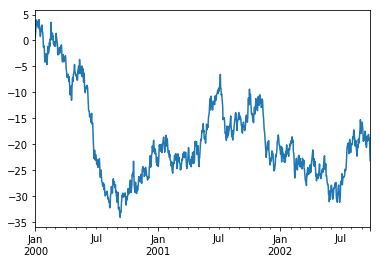

In [248]:
%matplotlib inline

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

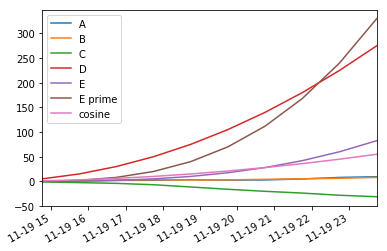

In [249]:
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')